## Exploratory Data Analysis for Synthetic Data - Impact Genome Project
### John (Jack) Leniart

Synthetic Data Source: https://github.com/adamhecktman/DePaulDataScienceIG

In [53]:
#cd C:\\Users\\jclen\\OneDrive\\Desktop\\DSC 672 - Capstone\\Group Project

In [4]:
import pandas as pd
import numpy as np

In [5]:
#fileName = 'Full Validated Outcome Data with Description.xlsx'
fileName = 'synth_data_new.csv'
synth_df = pd.read_csv(fileName)

In [6]:
synth_df.head(5)

,programdescription,impactarea,genome,outcome,outcomeid
0,"The Stellar Growth Initiative, spearheaded by ...",Economic Development,Organizational Leadership,Culture of Innovation,1
1,The Emerald Leadership Initiative is a transfo...,Economic Development,Organizational Leadership,Culture of Innovation,1
2,The Sapphire Leadership Initiative is dedicate...,Economic Development,Organizational Leadership,Culture of Innovation,1
3,The Sapphire Initiative is designed to foster ...,Economic Development,Organizational Leadership,Culture of Innovation,1
4,The Emerald Initiative fosters a dynamic envir...,Economic Development,Organizational Leadership,Culture of Innovation,1


In [7]:
#Check data types
synth_df.dtypes

programdescription    object
impactarea            object
genome                object
outcome               object
outcomeid              int64
dtype: object

In [8]:
synth_df.count()

programdescription    4409
impactarea            4409
genome                4409
outcome               4409
outcomeid             4409
dtype: int64

In [9]:
#Drop any null values
synth_df = synth_df.dropna()
synth_df.count()

programdescription    4409
impactarea            4409
genome                4409
outcome               4409
outcomeid             4409
dtype: int64

In [10]:
#Convert outcomeid to integer type (if needed)
#synth_df['outcomeid'] = synth_df['outcomeid'].astype(int)
#synth_df.dtypes

In [11]:
#Check descriptive statistics for all columns
synth_df.describe(include='all')

,programdescription,impactarea,genome,outcome,outcomeid
count,4409,4409,4409,4409,4409.000000
unique,4408,12,50,165,NaN
top,The Mosaic Collective fosters a vibrant connec...,Economic Development,Financial Health,Expand Reach and Scale Effective Strategies,NaN
freq,2,778,228,280,NaN
mean,NaN,NaN,NaN,NaN,332.589249
std,NaN,NaN,NaN,NaN,279.797356
min,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,103.000000
50%,NaN,NaN,NaN,NaN,210.000000
75%,NaN,NaN,NaN,NaN,516.000000


In [12]:
#Create new dataframe with the value counts for each unique outcome id
synth_ID_counts_df = pd.DataFrame(synth_df['outcomeid'].value_counts())

#Change column name to indicate the values are the counts of each outcome id
synth_ID_counts_df.columns = ['synth_outcomeid_count']

#Add new column with the actual outcome IDs (instead of just having them as index values)
synth_ID_counts_df['outcomeid'] = synth_ID_counts_df.index

synth_ID_counts_df.head(5)

,synth_outcomeid_count,outcomeid
outcomeid,,
287,24,287
166,24,166
367,24,367
496,24,496
179,24,179


In [13]:
import matplotlib.pyplot as plt

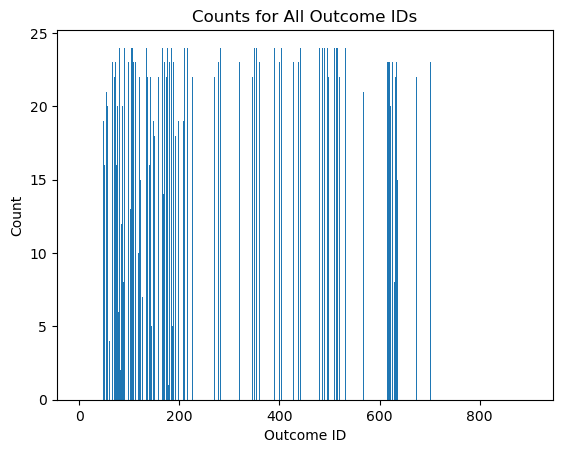

In [25]:
#Plot the counts of each outcome id
plt.bar(x = synth_ID_counts_df['outcomeid'], height = synth_ID_counts_df['synth_outcomeid_count'])
plt.title("Counts for All Outcome IDs")
plt.xlabel('Outcome ID')
plt.ylabel('Count')
plt.show()

In [27]:
#Check descriptive statistics
pd.set_option('display.float_format', lambda x: '%.2f' % x) #round to 2 decimal places
synth_ID_counts_df.describe()

,synth_outcomeid_count,outcomeid
count,230.00,230.00
mean,19.17,322.15
std,6.02,285.99
min,1.00,1.00
25%,17.00,88.50
50%,22.00,190.00
75%,23.00,515.50
max,24.00,901.00


In [29]:
#Reset index values to (0, 1, 2, ...) instead of the outcome IDs
synth_ID_counts_df.reset_index(drop=True, inplace=True)

In [31]:
#Merge with the original dataframe to add the outcome names
synth_outcome_df = synth_df[['outcome','outcomeid']]
synth_merged_df = synth_ID_counts_df.merge(synth_outcome_df, how = 'left', on = 'outcomeid')
synth_merged_df.drop_duplicates(subset = 'outcomeid', inplace = True)
synth_merged_df.head(10)

,synth_outcomeid_count,outcomeid,outcome
0,24,287,Creating Advocates and Issue Awareness (Indivi...
24,24,166,Reduced Risk of Human Trafficking
48,24,367,Expand Reach and Scale Effective Strategies
72,24,496,Network Building and Capacity Development (Org...
96,24,179,Reduced Stigma
120,24,123,Improved Mental Well-Being
144,24,177,Reduced Risk of Malnutrition
168,24,176,Reduced Risk of Hunger
192,24,90,Highly Engaged Employees
216,24,510,Network Building and Capacity Development (Org...


------------------------------------

In [34]:
#Let's look at the outcomes that appear the most frequently in the synthetic data
most_freq_df = synth_merged_df[synth_merged_df['synth_outcomeid_count']>=23]
most_freq_df.head(5)

,synth_outcomeid_count,outcomeid,outcome
0,24,287,Creating Advocates and Issue Awareness (Indivi...
24,24,166,Reduced Risk of Human Trafficking
48,24,367,Expand Reach and Scale Effective Strategies
72,24,496,Network Building and Capacity Development (Org...
96,24,179,Reduced Stigma


In [36]:
#Check number of outcomes that appear >= 23 times
most_freq_df.shape

(93, 3)

Next, let's compare the counts of those 93 outcome ids to their counts in the original dataset

In [39]:
#Read in original data
orig_fileName = 'Validated Data from Heather.xlsx'
orig_df = pd.read_excel(orig_fileName)
#Drop all null values
orig_df = orig_df.dropna()
orig_df.count()

programreportid       6442
programdescription    6442
impactarea            6442
genome                6442
outcome               6442
outcomeid             6442
dtype: int64

In [41]:
#Convert outcomeid to integer type
orig_df['outcomeid'] = orig_df['outcomeid'].astype(int)
orig_df.dtypes

programreportid        int64
programdescription    object
impactarea            object
genome                object
outcome               object
outcomeid              int32
dtype: object

In [43]:
#Create new dataframe with the value counts for each unique outcome id
orig_ID_counts_df = pd.DataFrame(orig_df['outcomeid'].value_counts())
#Change column name to indicate the values are the counts of each outcome id
orig_ID_counts_df.columns = ['orig_outcomeid_count']
#Add new column with the actual outcome IDs (instead of just having them as index values)
orig_ID_counts_df['outcomeid'] = orig_ID_counts_df.index
orig_ID_counts_df.head(5)

,orig_outcomeid_count,outcomeid
outcomeid,,
872,361,872
190,246,190
7,235,7
21,224,21
96,198,96


In [45]:
#Reset index values to (0, 1, 2, ...) instead of the outcome IDs
orig_ID_counts_df.reset_index(drop=True, inplace=True)

In [47]:
#Merge the dataframes so the synthetic and original outcome id counts are in the same df
most_freq_df = most_freq_df.merge(orig_ID_counts_df, how = 'left', on = 'outcomeid')
most_freq_df.head(5)

,synth_outcomeid_count,outcomeid,outcome,orig_outcomeid_count
0,24,287,Creating Advocates and Issue Awareness (Indivi...,1
1,24,166,Reduced Risk of Human Trafficking,3
2,24,367,Expand Reach and Scale Effective Strategies,1
3,24,496,Network Building and Capacity Development (Org...,2
4,24,179,Reduced Stigma,2


In [49]:
#Check descriptive statistics
most_freq_df.describe(include='all')

,synth_outcomeid_count,outcomeid,outcome,orig_outcomeid_count
count,93.00,93.00,93,93.00
unique,NaN,NaN,63,NaN
top,NaN,NaN,Expand Reach and Scale Effective Strategies,NaN
freq,NaN,NaN,10,NaN
mean,23.53,334.25,NaN,1.97
std,0.50,255.47,NaN,1.35
min,23.00,3.00,NaN,1.00
25%,23.00,113.00,NaN,1.00
50%,24.00,282.00,NaN,2.00
75%,24.00,493.00,NaN,2.00


We see that the most frequent outcomes in the synthetic dataset were those that were underrepresented in the original dataset